In [42]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r"C:\Users\stmma\Desktop\Start-Up Project\startup_data.csv")

# Check the first rows
df.head()

,Startup_Name,Industry,Funding_Rounds,Funding_Amount_M,Valuation_M,Revenue_M,Employees,Funding_Per_Employee_M,Revenue_Per_Employee_M,Market_Share,Profitable,Estimated_Costs_M,Profit_M,Profit_Margin,Funding_Efficiency,ROI_Percent,Year_Founded,Startup_Age,Region,Exit_Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,0.069,0.046,5.20,0,54.30,13.57,20,0.67,735.64,2006,16,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,0.075,0.023,8.10,1,30.26,45.39,60,0.31,1237.06,2003,19,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,0.022,0.017,2.61,1,33.68,50.53,60,0.77,869.76,1995,27,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,0.010,0.044,2.53,0,37.66,9.42,20,4.38,847.91,2003,19,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,0.131,0.026,4.09,0,40.20,10.05,20,0.20,241.03,1997,25,Europe,Acquired


In [43]:
# Check for missing values
df.isnull().sum()

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Ensure numeric columns are correct type
numeric_cols = ['Funding_Amount_M', 'Valuation_M', 'Revenue_M', 'Employees', 'Market_Share']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Reset index just in case
df.reset_index(drop=True, inplace=True)

print("Data cleaned and ready for analysis.")

Data cleaned and ready for analysis.


In [3]:
import pandas as pd
import numpy as np

In [44]:
df.columns = df.columns.str.strip().str.lower()

In [45]:
df.head()

,startup_name,industry,funding_rounds,funding_amount_m,valuation_m,revenue_m,employees,funding_per_employee_m,revenue_per_employee_m,market_share,profitable,estimated_costs_m,profit_m,profit_margin,funding_efficiency,roi_percent,year_founded,startup_age,region,exit_status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,0.069,0.046,5.20,0,54.30,13.57,20,0.67,735.64,2006,16,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,0.075,0.023,8.10,1,30.26,45.39,60,0.31,1237.06,2003,19,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,0.022,0.017,2.61,1,33.68,50.53,60,0.77,869.76,1995,27,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,0.010,0.044,2.53,0,37.66,9.42,20,4.38,847.91,2003,19,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,0.131,0.026,4.09,0,40.20,10.05,20,0.20,241.03,1997,25,Europe,Acquired


In [46]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df['ROI_norm'] = normalize(df['roi_percent'])
df['FundingEff_norm'] = normalize(df['funding_efficiency'])
df['Valuation_norm'] = normalize(df['valuation_m'])
df['RevenuePerEmp_norm'] = normalize(df['revenue_per_employee_m'])
df['Age_norm'] = normalize(df['startup_age'])

In [47]:
df.head()

,startup_name,industry,funding_rounds,funding_amount_m,valuation_m,revenue_m,employees,funding_per_employee_m,revenue_per_employee_m,market_share,...,roi_percent,year_founded,startup_age,region,exit_status,ROI_norm,FundingEff_norm,Valuation_norm,RevenuePerEmp_norm,Age_norm
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,0.069,0.046,5.20,...,735.64,2006,16,Europe,Private,0.448392,0.006669,0.193412,0.017686,0.50000
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,0.075,0.023,8.10,...,1237.06,2003,19,South America,Private,0.868138,0.003086,0.759668,0.008843,0.59375
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,0.022,0.017,2.61,...,869.76,1995,27,South America,Private,0.560666,0.007665,0.242692,0.006536,0.84375
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,0.010,0.044,2.53,...,847.91,2003,19,South America,Private,0.542375,0.043599,0.022840,0.016917,0.59375
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,0.131,0.026,4.09,...,241.03,1997,25,Europe,Acquired,0.034347,0.001991,0.194643,0.009996,0.78125


In [48]:
df['ROI_risk'] = 1 - df['ROI_norm']
df['FundingEff_risk'] = 1 - df['FundingEff_norm']
df['Valuation_risk'] = 1 - df['Valuation_norm']
df['RevenuePerEmp_risk'] = 1 - df['RevenuePerEmp_norm']
df['Age_risk'] = 1 - df['Age_norm']

In [49]:
df['ProfitMargin_risk'] = df['profit_margin'].apply(lambda x: 1 if x == 20 else 0)

In [50]:
exit_adjustment = {'Acquired': -0.05, 'IPO': 0.00, 'Private': 0.05}
df['Exit_Adjustment'] = df['exit_status'].map(exit_adjustment)

In [51]:
df['Risk_Score'] = (
    df['ROI_risk'] * 0.25 +
    df['FundingEff_risk'] * 0.20 +
    df['Valuation_risk'] * 0.15 +
    df['RevenuePerEmp_risk'] * 0.15 +
    df['ProfitMargin_risk'] * 0.10 +
    df['Age_risk'] * 0.10
)

# Apply Exit Status adjustment
df['Risk_Score'] = df['Risk_Score'] + df['Exit_Adjustment']

In [53]:
df.to_csv("startups_with_risk_score.csv", index=False)
print("Risk scores calculated and file saved!")

Risk scores calculated and file saved!


In [19]:
import seaborn as sns

In [55]:
df.head()

,startup_name,industry,funding_rounds,funding_amount_m,valuation_m,revenue_m,employees,funding_per_employee_m,revenue_per_employee_m,market_share,...,RevenuePerEmp_norm,Age_norm,ROI_risk,FundingEff_risk,Valuation_risk,RevenuePerEmp_risk,Age_risk,ProfitMargin_risk,Exit_Adjustment,Risk_Score
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,0.069,0.046,5.20,...,0.017686,0.50000,0.551608,0.993331,0.806588,0.982314,0.50000,1,0.05,0.804904
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,0.075,0.023,8.10,...,0.008843,0.59375,0.131862,0.996914,0.240332,0.991157,0.40625,0,0.05,0.507697
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,0.022,0.017,2.61,...,0.006536,0.84375,0.439334,0.992335,0.757308,0.993464,0.15625,0,0.05,0.636541
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,0.010,0.044,2.53,...,0.016917,0.59375,0.457625,0.956401,0.977160,0.983083,0.40625,1,0.05,0.790348
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,0.131,0.026,4.09,...,0.009996,0.78125,0.965653,0.998009,0.805357,0.990004,0.21875,1,-0.05,0.782194


In [66]:
df['Risk_Score'].describe()

count    500.000000
mean       0.704800
std        0.121354
min        0.355717
25%        0.619726
50%        0.707544
75%        0.797333
max        0.967398
Name: Risk_Score, dtype: float64

Very Low Risk: 0.35 - 0.55
Low Risk: 0.55 - 0.62
Medium Risk: 0.62 - 0.75
High Risk: 0.75 - 0.85
Very High Risk: 0.85 - 1.00


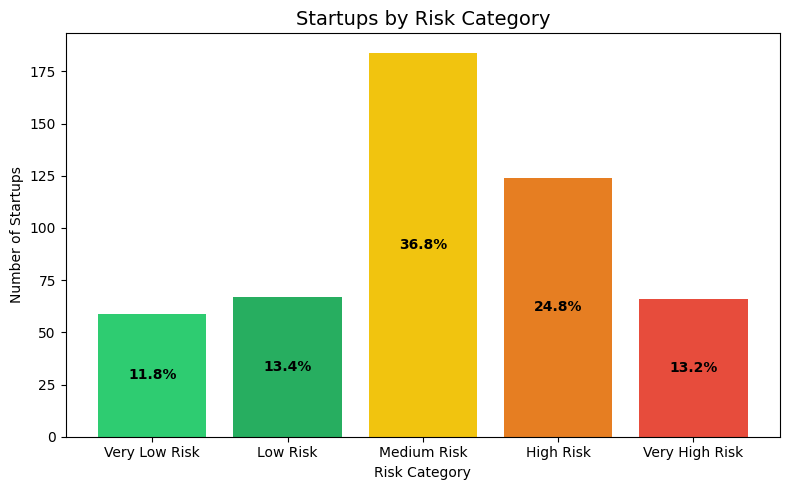

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

risk_column = 'Risk_Score'

# Define categories (quantiles)
bins = [0.35, 0.55, 0.62, 0.75, 0.85, 1.0]
labels = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
df['risk_category'] = pd.cut(df['Risk_Score'], bins=bins, labels=labels, include_lowest=True)

# Calculate ranges for each category
for label, start, end in zip(labels, bins[:-1], bins[1:]):
    print(f"{label}: {start:.2f} - {end:.2f}")

# Count startups in each category
counts = df['risk_category'].value_counts().sort_index()

# Calculate percentages
percentages = counts / counts.sum() * 100

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(counts.index, counts, color=['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c'])

# Add percentage labels on top
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{pct:.1f}%',
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Titles and labels
ax.set_title('Startups by Risk Category', fontsize=14)
ax.set_ylabel('Number of Startups')
ax.set_xlabel('Risk Category')

plt.tight_layout()
plt.show()

In [74]:
df.head()

,startup_name,industry,funding_rounds,funding_amount_m,valuation_m,revenue_m,employees,funding_per_employee_m,revenue_per_employee_m,market_share,...,Age_norm,ROI_risk,FundingEff_risk,Valuation_risk,RevenuePerEmp_risk,Age_risk,ProfitMargin_risk,Exit_Adjustment,Risk_Score,risk_category
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,0.069,0.046,5.20,...,0.50000,0.551608,0.993331,0.806588,0.982314,0.50000,1,0.05,0.804904,High Risk
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,0.075,0.023,8.10,...,0.59375,0.131862,0.996914,0.240332,0.991157,0.40625,0,0.05,0.507697,Very Low Risk
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,0.022,0.017,2.61,...,0.84375,0.439334,0.992335,0.757308,0.993464,0.15625,0,0.05,0.636541,Medium Risk
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,0.010,0.044,2.53,...,0.59375,0.457625,0.956401,0.977160,0.983083,0.40625,1,0.05,0.790348,High Risk
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,0.131,0.026,4.09,...,0.78125,0.965653,0.998009,0.805357,0.990004,0.21875,1,-0.05,0.782194,High Risk


In [70]:
# Export full dataset with risk score & category to CSV
df.to_csv("startups_risk_score.csv", index=False)
print("✅ Dataset saved with risk scores and categories.")

✅ Dataset saved with risk scores and categories.
